In [0]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

# Initialize Spark session
spark = SparkSession.builder.appName("KMeansClustering").getOrCreate()

# Load data
df = spark.read.csv("/FileStore/tables/Housing.csv", header=True, inferSchema=True)

# Drop categorical columns
columns_to_drop = ["mainroad", "guestroom", "basaroom", "hotwaterheating", "airconditioning", "prefarea"]
df = df.drop(*columns_to_drop)


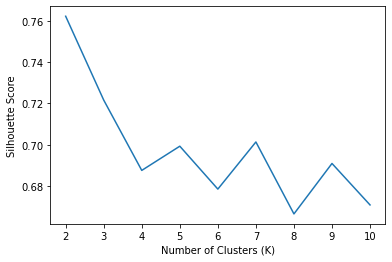

In [0]:
silhouette_scores = []
from pyspark.sql.functions import col

# Drop additional categorical column 'basement'
df = df.drop('basement')
for k in range(2, 11):
    # Drop 'furnishingstatus' from features but keep in DataFrame
    feature_columns = [c for c in df.columns if c != 'furnishingstatus']

    # Assemble features (ensure all are numerical)
    vec_assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
    df_kmeans = vec_assembler.transform(df).select('features', 'furnishingstatus')

    # Apply KMeans
    kmeans = KMeans().setK(k).setSeed(1)
    model = kmeans.fit(df_kmeans)

    # Evaluate clustering
    evaluator = ClusteringEvaluator()
    silhouette = evaluator.evaluate(model.transform(df_kmeans))
    silhouette_scores.append(silhouette)

# Plot the silhouette scores
import matplotlib.pyplot as plt

plt.plot(range(2, 11), silhouette_scores)
plt.xticks(range(2, 11))
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()


/databricks/spark/python/pyspark/sql/pandas/conversion.py:122: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unable to convert the field pcaFeatures. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Direct cause: Unsupported type in conversion to Arrow: VectorUDT()
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warn(msg)


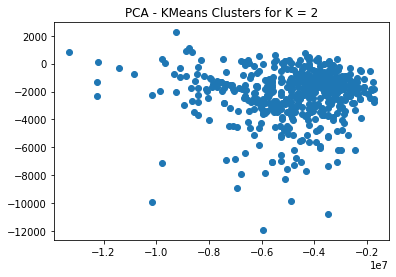

/databricks/spark/python/pyspark/sql/pandas/conversion.py:122: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unable to convert the field pcaFeatures. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Direct cause: Unsupported type in conversion to Arrow: VectorUDT()
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warn(msg)


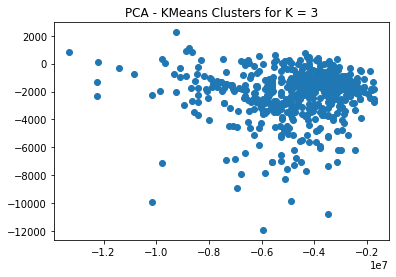

/databricks/spark/python/pyspark/sql/pandas/conversion.py:122: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unable to convert the field pcaFeatures. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Direct cause: Unsupported type in conversion to Arrow: VectorUDT()
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warn(msg)


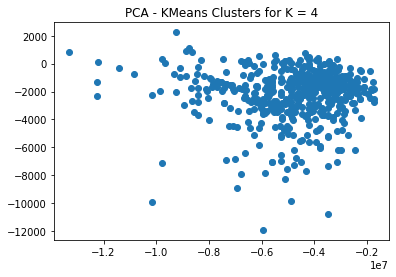

/databricks/spark/python/pyspark/sql/pandas/conversion.py:122: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unable to convert the field pcaFeatures. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Direct cause: Unsupported type in conversion to Arrow: VectorUDT()
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warn(msg)


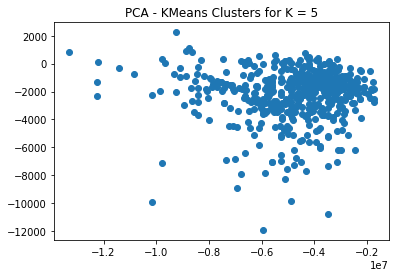

/databricks/spark/python/pyspark/sql/pandas/conversion.py:122: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unable to convert the field pcaFeatures. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Direct cause: Unsupported type in conversion to Arrow: VectorUDT()
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warn(msg)


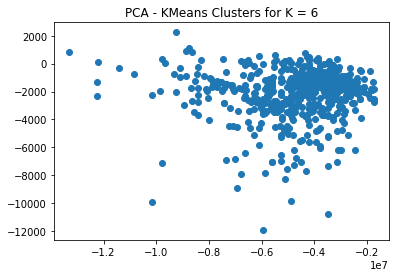

/databricks/spark/python/pyspark/sql/pandas/conversion.py:122: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unable to convert the field pcaFeatures. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Direct cause: Unsupported type in conversion to Arrow: VectorUDT()
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warn(msg)


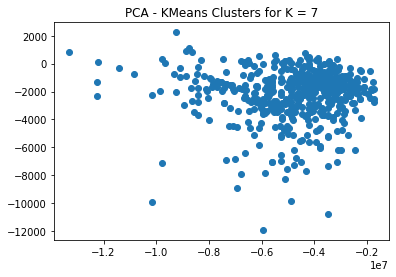

/databricks/spark/python/pyspark/sql/pandas/conversion.py:122: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unable to convert the field pcaFeatures. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Direct cause: Unsupported type in conversion to Arrow: VectorUDT()
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warn(msg)


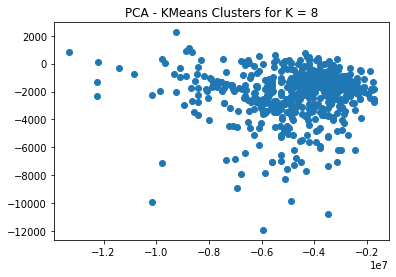

/databricks/spark/python/pyspark/sql/pandas/conversion.py:122: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unable to convert the field pcaFeatures. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Direct cause: Unsupported type in conversion to Arrow: VectorUDT()
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warn(msg)


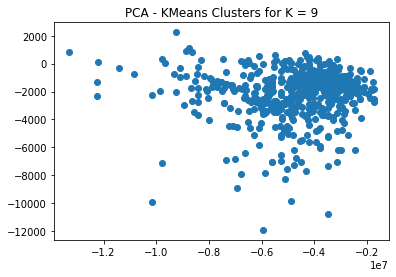

/databricks/spark/python/pyspark/sql/pandas/conversion.py:122: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unable to convert the field pcaFeatures. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Direct cause: Unsupported type in conversion to Arrow: VectorUDT()
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warn(msg)


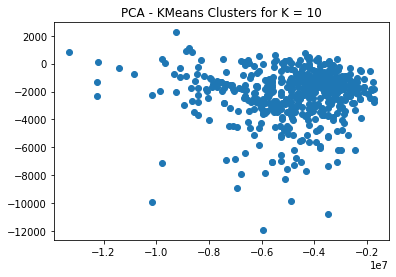

In [0]:
from pyspark.ml.feature import PCA
import numpy as np
for k in range(2, 11):
    kmeans = KMeans().setK(k).setSeed(1)
    model = kmeans.fit(df_kmeans)

    # Transform the dataset
    transformed = model.transform(df_kmeans)

    # Apply PCA
    pca = PCA(k=2, inputCol="features", outputCol="pcaFeatures")
    pca_model = pca.fit(transformed)
    pca_result = pca_model.transform(transformed).select("pcaFeatures")

    # Convert to Pandas for plotting
    pca_result_pandas = pca_result.toPandas()

    # Extract PCA features for plotting
    pca_features = np.array(pca_result_pandas['pcaFeatures'].tolist())
    plt.scatter(pca_features[:, 0], pca_features[:, 1])
    plt.title(f"PCA - KMeans Clusters for K = {k}")
    plt.show()


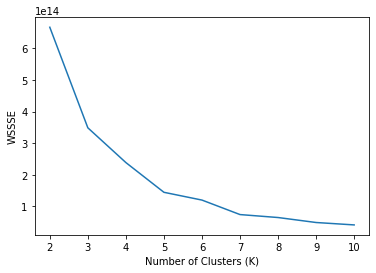

In [0]:
wssse_values = []
for k in range(2, 11):
    kmeans = KMeans().setK(k).setSeed(1)
    model = kmeans.fit(df_kmeans)
    wssse = model.summary.trainingCost
    wssse_values.append(wssse)

# Plot WSSSE values
plt.plot(range(2, 11), wssse_values)
plt.xticks(range(2, 11))
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WSSSE')
plt.show()


In [0]:
from pyspark.sql import SparkSession
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.recommendation import ALS
from pyspark.sql import Row
spark = SparkSession.builder.appName("ALSExample").getOrCreate()
lines = spark.read.text("/FileStore/tables/ratings.dat").rdd
parts = lines.map(lambda row: row.value.split("::"))
ratingsRDD = parts.map(lambda p: Row(userId=int(p[0]), movieId=int(p[1]), rating=float(p[2]), timestamp=int(p[3])))
ratings = spark.createDataFrame(ratingsRDD)
(training, test) = ratings.randomSplit([0.7, 0.3])
als = ALS(maxIter=50, regParam=0.05, userCol="userId", itemCol="movieId", ratingCol="rating", coldStartStrategy="drop")
model = als.fit(training)
predictions = model.transform(test)
evaluator = RegressionEvaluator(metricName="mse", labelCol="rating", predictionCol="prediction")
mse = evaluator.evaluate(predictions)
print("Mean Squared Error (MSE) = " + str(mse))


Mean Squared Error (MSE) = 0.738850228591604


In [0]:
import sparknlp
from sparknlp.base import *
from sparknlp.annotator import *
from pyspark.ml import Pipeline
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

train_df = spark.read.csv("/FileStore/tables/Train.csv", header=True, multiLine=True, escape='\"')
test_df = spark.read.csv("/FileStore/tables/Test.csv", header=True, multiLine=True, escape='\"')

# Check the distribution of the classes
train_df.groupBy("label").count().show()
test_df.groupBy("label").count().show()


+-----+-----+
|label|count|
+-----+-----+
|    0|20019|
|    1|19981|
+-----+-----+

+-----+-----+
|label|count|
+-----+-----+
|    0| 2495|
|    1| 2505|
+-----+-----+



In [0]:
document_assembler = DocumentAssembler() \
    .setInputCol("text") \
    .setOutputCol("document")

use = UniversalSentenceEncoder.pretrained() \
    .setInputCols(["document"]) \
    .setOutputCol("embeddings")

classifier = ClassifierDLApproach() \
    .setInputCols(["embeddings"]) \
    .setOutputCol("class") \
    .setLabelColumn("label") \
    .setMaxEpochs(10) \
    .setEnableOutputLogs(True)

pipeline = Pipeline(stages=[
    document_assembler, 
    use, 
    classifier
])


tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]


In [0]:
pipeline_model = pipeline.fit(train_df)
predictions = pipeline_model.transform(test_df)


In [0]:
from pyspark.sql.functions import col, udf
from pyspark.sql.types import StringType

# UDF to extract the result from the complex structure
extract_prediction = udf(lambda x: x[0].result, StringType())

# Apply the UDF to create a new column with the extracted prediction
predictions = predictions.withColumn("prediction", extract_prediction(col("class")))

# Convert the prediction column to numeric type as the label column is numeric
predictions = predictions.withColumn("prediction", predictions["prediction"].cast("double"))

predictions.select("text", "label", "prediction").show(5)


+--------------------+-----+----------+
|                text|label|prediction|
+--------------------+-----+----------+
|I always wrote th...|    0|       0.0|
|1st watched 12/7/...|    0|       0.0|
|This movie was so...|    0|       0.0|
|The most interest...|    1|       1.0|
|when i first read...|    0|       0.0|
+--------------------+-----+----------+
only showing top 5 rows



In [0]:
from pyspark.sql.functions import col

# Convert the 'label' column to a numeric type
predictions = predictions.withColumn("label", col("label").cast("double"))

# Check the schema to ensure the conversion was successful
predictions.printSchema()


root
 |-- text: string (nullable = true)
 |-- label: double (nullable = true)
 |-- document: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- annotatorType: string (nullable = true)
 |    |    |-- begin: integer (nullable = false)
 |    |    |-- end: integer (nullable = false)
 |    |    |-- result: string (nullable = true)
 |    |    |-- metadata: map (nullable = true)
 |    |    |    |-- key: string
 |    |    |    |-- value: string (valueContainsNull = true)
 |    |    |-- embeddings: array (nullable = true)
 |    |    |    |-- element: float (containsNull = false)
 |-- embeddings: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- annotatorType: string (nullable = true)
 |    |    |-- begin: integer (nullable = false)
 |    |    |-- end: integer (nullable = false)
 |    |    |-- result: string (nullable = true)
 |    |    |-- metadata: map (nullable = true)
 |    |    |    |-- key: string
 |    |    |    |-- 

In [0]:
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction")

accuracy = evaluator.evaluate(predictions, {evaluator.metricName: "accuracy"})
f1 = evaluator.evaluate(predictions, {evaluator.metricName: "f1"})
precision = evaluator.evaluate(predictions, {evaluator.metricName: "weightedPrecision"})
recall = evaluator.evaluate(predictions, {evaluator.metricName: "weightedRecall"})

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.8632
F1 Score: 0.8631797719634668
Precision: 0.8633762155036622
Recall: 0.8632
